In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import colorsys

In [2]:
imageNames = [
    "5436e3c6bae478396759f233.jpg",
    "5aaf1253116597691362835b.jpg",
    "5aaf12ba116597691362b671.jpg",
    "5aaf13841165976913631d42.jpg",
    "5aaf1320116597691362ea91.jpg",
    "5592cfca9fc3c131551458e7.jpg",
    "5436e3b8bae478396759f18d.jpg"
]

def readAndConvert(image):
    im = cv2.imread(image)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

images = [readAndConvert(image)for image in imageNames]

colorSpaceCount = 6

RGB = "RGB"
HSV = "HSV"
LUV = "LUV"
LUV_INVERTED = "LUV_INVERTED"
XYZ = "XYZ"
# "YUV": cv2.cvtColor(im_luv, cv2.COLOR_RGB2YUV),
HSL = "HSL"
# GRAY = "GRAY"

def getImageSpaces(im_RGB):
    return {
        RGB: im_RGB,
        HSV: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HSV),
        LUV: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2LUV),
        LUV_INVERTED: cv2.bitwise_not(cv2.cvtColor(im_RGB, cv2.COLOR_RGB2LUV)),
        XYZ: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2XYZ),
        # "YUV": cv2.cvtColor(im_luv, cv2.COLOR_RGB2YUV),
        HSL: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HLS)
#         GRAY: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2GRAY)

    }

def getSpaceLabels(space):
    if space is RGB:
        return ["Red", "Green", "Blue"]
    elif space is HSV:
        return ["Hue", "Saturation", "Value"]
    else:
        return ["x_label", "y_label", "z_label"]


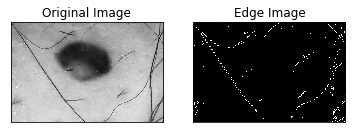

In [6]:
img = cv2.imread(imageNames[0],0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

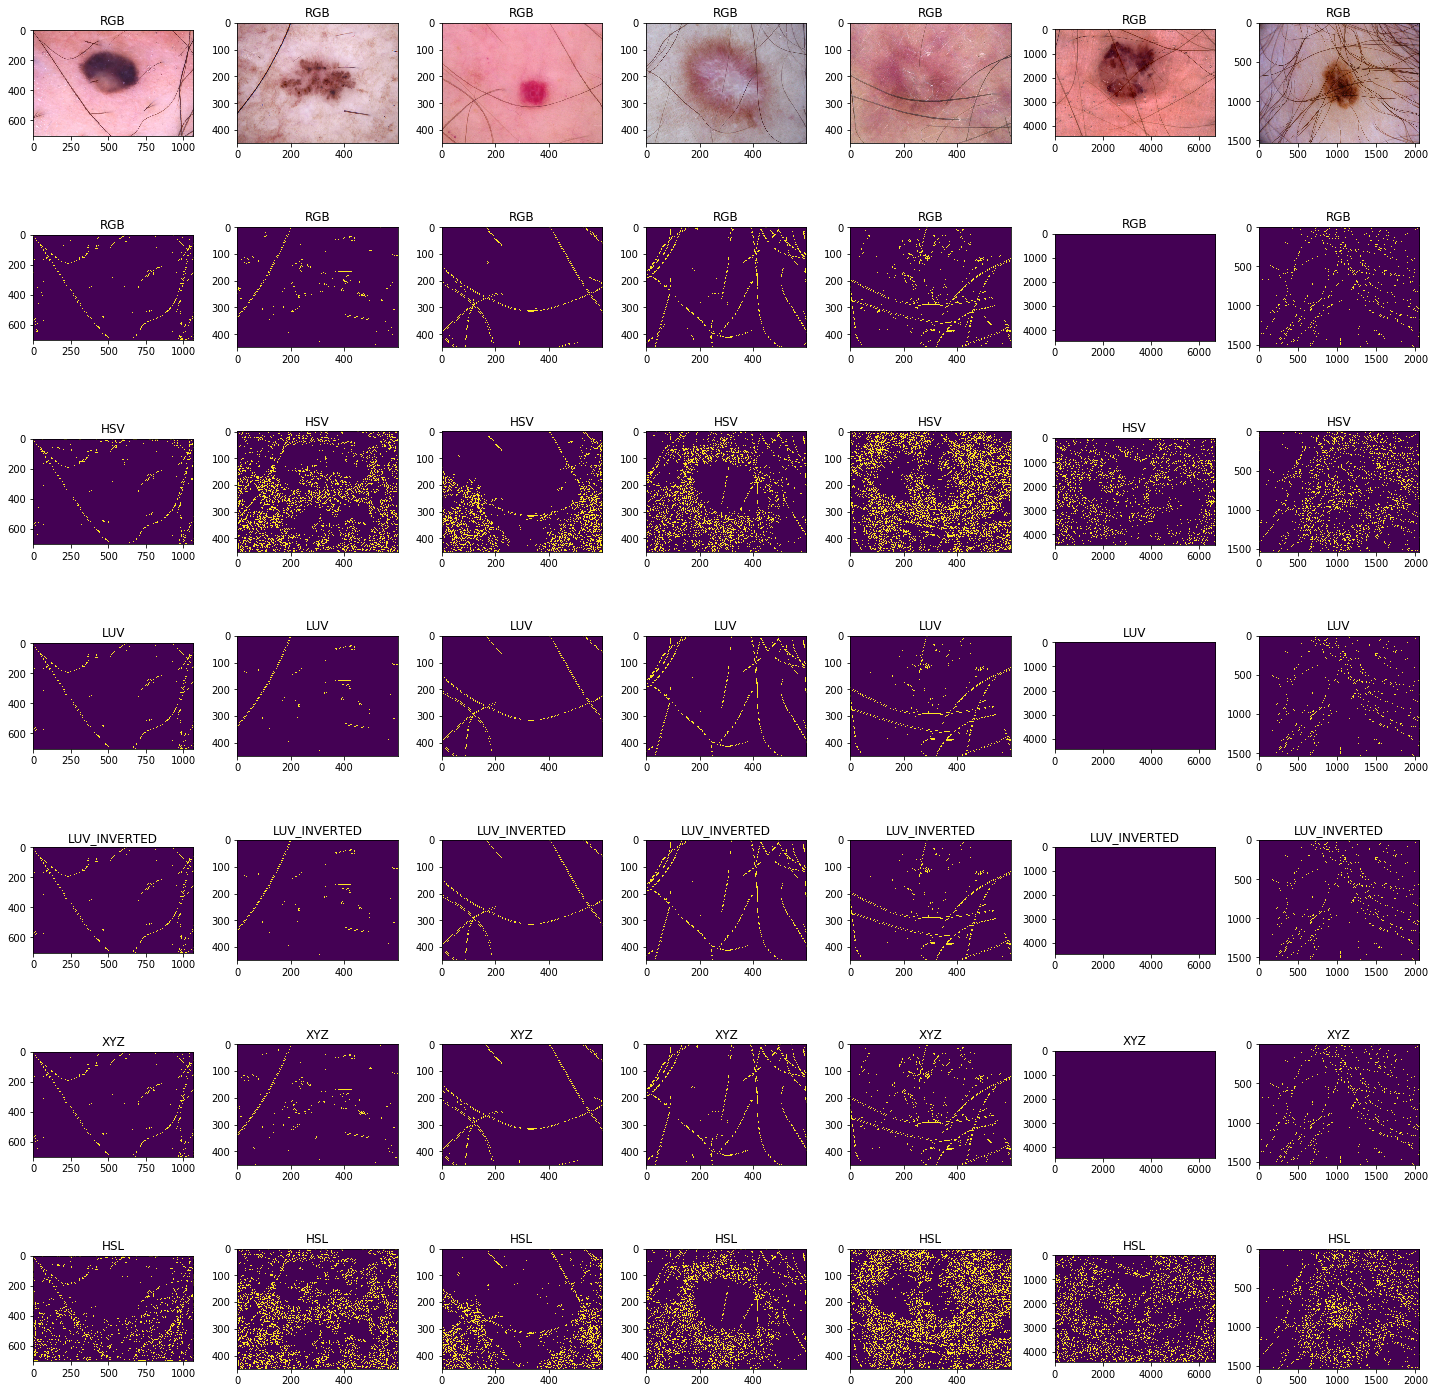

In [44]:
fig, axs = plt.subplots(colorSpaceCount + 1, len(imageNames), figsize=(20,20))
# fig.suptitle('Color Spaces')
fig.tight_layout(pad=1.0)

for i in range(len(images)):
    im = images[i]
#     im_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imageSpaces = getImageSpaces(im)
    
    axs[0, i].set_title('RGB')
    axs[0, i].imshow(im)
    
    j = 1
    for key, value in imageSpaces.items():
        edges = cv2.Canny(value,100,200)
        axs[j, i].set_title(key)
        axs[j, i].imshow(edges)
        j = j +1

In [42]:
'''
Simple and fast image transforms to mimic:
 - brightness
 - contrast
 - erosion 
 - dilation
'''
def showContrast(imageNameIndex):
    from pylab import array, plot, show, axis, arange, figure, uint8 

    row = 2
    col = 3

    fig2, axs = plt.subplots(row,col,  figsize=(15,5))
    fig2.suptitle('Contrast')


    # Image data
    image = cv2.imread(imageNames[imageNameIndex],0) # load as 1-channel 8bit grayscale

    axs[0, 0].set_title('Image')
    axs[0, 0].imshow(image)
    maxIntensity = 255.0 # depends on dtype of image data
    x = arange(maxIntensity) 
    edges = cv2.Canny(image,100,200)
    axs[1, 0].set_title('Image')
    axs[1, 0].imshow(edges)

    # Parameters for manipulating image data
    phi = 1
    theta = 1

    # Increase intensity such that
    # dark pixels become much brighter, 
    # bright pixels become slightly bright
    newImage0 = (maxIntensity/phi)*(image/(maxIntensity/theta))**0.5
    newImage0 = array(newImage0,dtype=uint8)

    axs[0, 1].set_title('Image0')
    axs[0, 1].imshow(newImage0)
    edges = cv2.Canny(newImage0,100,200)
    axs[1, 1].set_title('Image0')
    axs[1, 1].imshow(edges)

    y = (maxIntensity/phi)*(x/(maxIntensity/theta))**0.5

    # Decrease intensity such that
    # dark pixels become much darker, 
    # bright pixels become slightly dark 
    newImage1 = (maxIntensity/phi)*(image/(maxIntensity/theta))**2
    newImage1 = array(newImage1,dtype=uint8)


    axs[0, 2].set_title('Image1')
    axs[0, 2].imshow(newImage1)
    edges = cv2.Canny(newImage1,100,200)
    axs[1, 2].set_title('Image1')
    axs[1, 2].imshow(edges)

    z = (maxIntensity/phi)*(x/(maxIntensity/theta))**2

    # # Plot the figures
    # figure()
    # plot(x,y,'r-') # Increased brightness
    # plot(x,x,'k:') # Original image
    # plot(x,z, 'b-') # Decreased brightness
    # #axis('off')
    # axis('tight')
    # show()

    # # Close figure window and click on other window 
    # # Then press any keyboard key to close all windows
    # closeWindow = -1
    # while closeWindow<0:
    #     closeWindow = cv2.waitKey(1) 
    # cv2.destroyAllWindows()

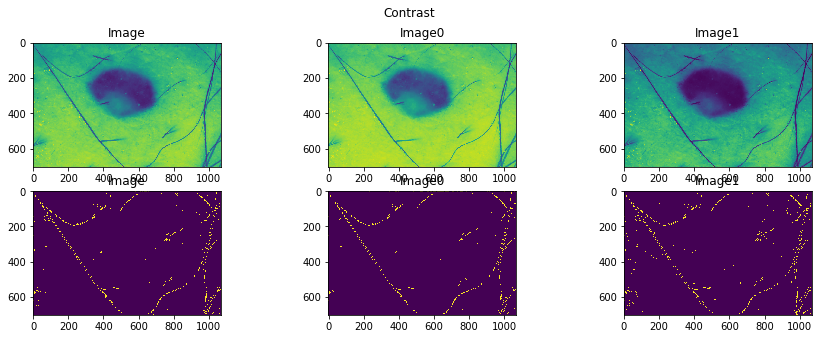

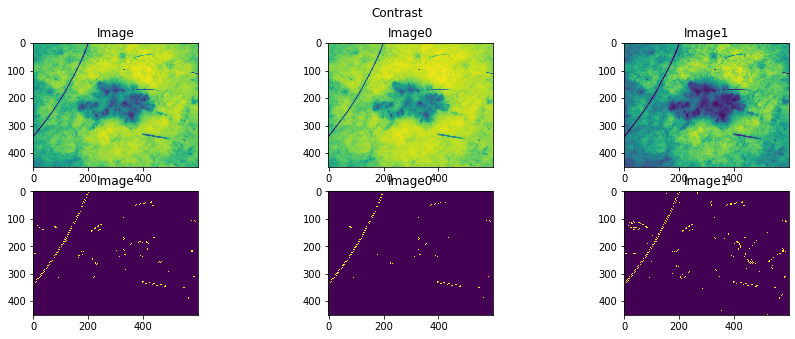

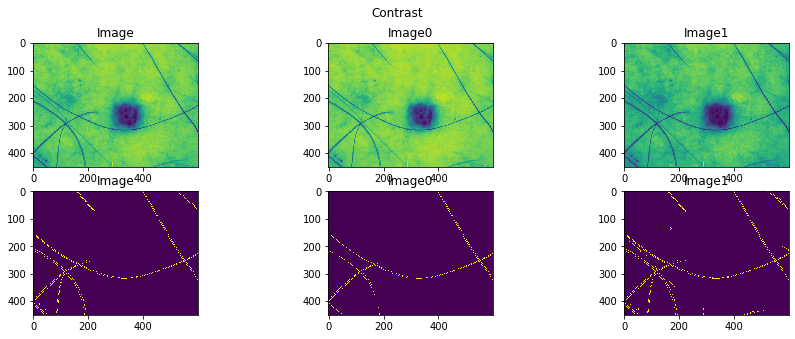

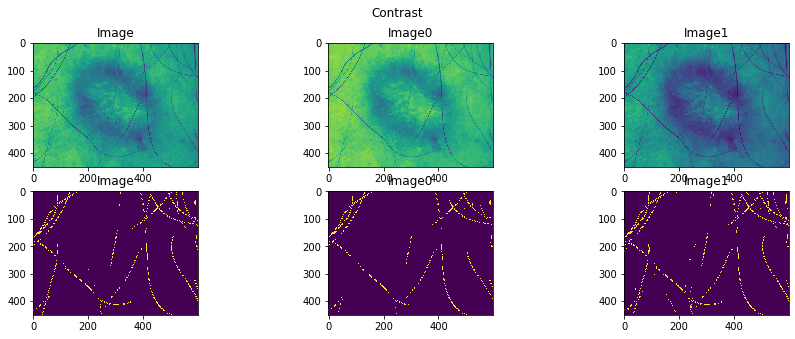

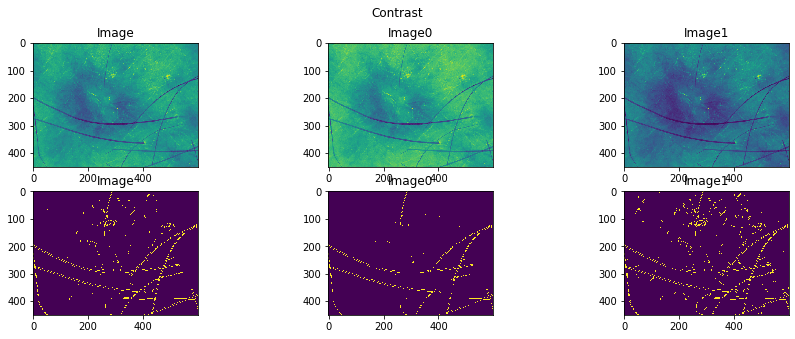

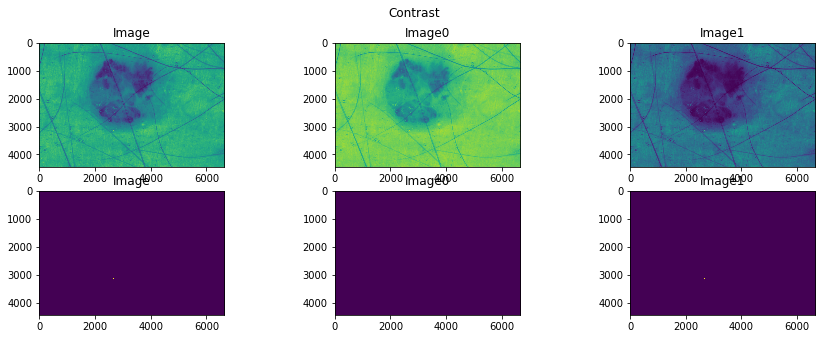

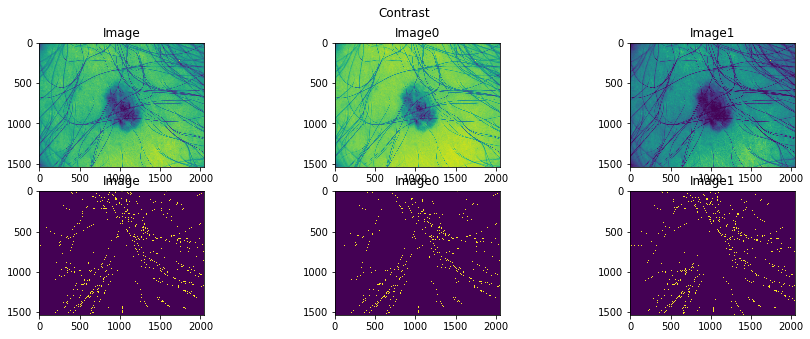

In [43]:
for i in range(7):
    showContrast(i)

In [84]:
def greenHighlights(imageIndex, edges):
    indices = np.where(edges != [0])
    coordinates = zip(indices[0], indices[1])
    
    img2 =  readAndConvert(imageNames[imageIndex])

    for c in coordinates:
        img2[c[0], c[1]] = (0,255,0)
    
    return img2


In [118]:
from statistics import mean 

def blurHairs(imageIndex, edges):
    indices = np.where(edges != [0])
    coordinates = zip(indices[0], indices[1])
    
    img2 =  readAndConvert(imageNames[imageIndex])        
#     h, w, c = im.shape
#     print(h, w, c)
    for c in coordinates:
        x = c[0]
        y = c[1]
        r = 0
        g = 0
        b = 0
        count = 0
        tempCoordinates = [[x, y+1], [x, y-1], [x+1, y], [x+1, y+1], [x+1, y-1], [x-1, y], [x-1, y+1], [x-1, y-1]]
        
        for c2 in tempCoordinates:
            x2 = c2[0]
            y2 = c2[1]
            try:
                r = r + img2[x2, y2][0]
                g = g + img2[x2, y2][1]
                b = b + img2[x2, y2][2]
                count = count + 1
            except:
                count = count - 1
            if count > 0:
                img2[x,y] = [r/count, g/count, b/count]
#             [mean([
#                          img2[x, y+1][0],
#                          img2[x, y-1][0],
#                          img2[x+1, y][0],
#                          img2[x+1, y+1][0],
#                          img2[x+1, y-1][0],
#                          img2[x-1, y][0],
#                          img2[x-1, y+1][0],
#                          img2[x-1, y-1][0],
#                         ]),
#                          mean([
#                          img2[x, y+1][1],
#                          img2[x, y-1][1],
#                          img2[x+1, y][1],
#                          img2[x+1, y+1][1],
#                          img2[x+1, y-1][1],
#                          img2[x-1, y][1],
#                          img2[x-1, y+1][1],
#                          img2[x-1, y-1][1],
#                         ]),
#                          mean([
#                          img2[x, y+1][2],
#                          img2[x, y-1][2],
#                          img2[x+1, y][2],
#                          img2[x+1, y+1][2],
#                          img2[x+1, y-1][2],
#                          img2[x-1, y][2],
#                          img2[x-1, y+1][2],
#                          img2[x-1, y-1][2],
#                         ])]
                     
    
    return img2

In [119]:
'''
Simple and fast image transforms to mimic:
 - brightness
 - contrast
 - erosion 
 - dilation
'''
def showContrastWithBluredEdgeDetection(imageNameIndex):
    from pylab import array, plot, show, axis, arange, figure, uint8 

    row = 3
    col = 6

    fig2, axs = plt.subplots(row,col,  figsize=(25,7))
    fig2.suptitle('Contrast')


    # Image data
    image = cv2.imread(imageNames[imageNameIndex],0) # load as 1-channel 8bit grayscale

    axs[0, 0].set_title('Image')
    axs[0, 0].imshow(image)
    maxIntensity = 255.0 # depends on dtype of image data
    x = arange(maxIntensity) 
    edges = cv2.Canny(image,100,200)
    axs[0, 1].set_title('edges')
    axs[0, 1].imshow(edges)
    
    axs[0, 2].set_title('identificaiton without blur')
    axs[0, 2].imshow(greenHighlights(imageNameIndex, edges))
    
    edges2 =cv2.bilateralFilter(edges,10,350,9)
    axs[0, 3].set_title('blurred edges')
    axs[0, 3].imshow(edges2)
    
    axs[0, 4].set_title('identificaiton with blur')
    axs[0, 4].imshow(greenHighlights(imageNameIndex, edges2))
    
    axs[0, 5].set_title('removed hairs')
    axs[0, 5].imshow(blurHairs(imageNameIndex, edges2))
    
    

    # Parameters for manipulating image data
    phi = 1
    theta = 1

    # Increase intensity such that
    # dark pixels become much brighter, 
    # bright pixels become slightly bright
    newImage0 = (maxIntensity/phi)*(image/(maxIntensity/theta))**0.5
    newImage0 = array(newImage0,dtype=uint8)

    axs[1, 0].set_title('dark pixels => much brighter : bright pixels => slightly bright')
    axs[1, 0].imshow(newImage0)
    edges = cv2.Canny(newImage0,100,200)
    axs[1, 1].set_title('edges')
    axs[1, 1].imshow(edges)
    
    axs[1, 2].set_title('identificaiton without blur')
    axs[1, 2].imshow(greenHighlights(imageNameIndex, edges))
    
    edges2 =cv2.bilateralFilter(edges,10,350,9)
    axs[1, 3].set_title('blurred edges')
    axs[1, 3].imshow(edges2)
    
    axs[1, 4].set_title('identificaiton with blur')
    axs[1, 4].imshow(greenHighlights(imageNameIndex, edges2))
    
#     axs[1, 5].set_title('removed hairs')
#     axs[1, 5].imshow(blurHairs(imageNameIndex, edges2))

    y = (maxIntensity/phi)*(x/(maxIntensity/theta))**0.5

    # Decrease intensity such that
    # dark pixels become much darker, 
    # bright pixels become slightly dark 
    newImage1 = (maxIntensity/phi)*(image/(maxIntensity/theta))**2
    newImage1 = array(newImage1,dtype=uint8)


    axs[2, 0].set_title('dark pixels => much darker : light pixels => slightly darker')
    axs[2, 0].imshow(newImage1)
    edges = cv2.Canny(newImage1,100,200)
    axs[2, 1].set_title('edges')
    axs[2, 1].imshow(edges)
    
    axs[2, 2].set_title('identificaiton without blur')
    axs[2, 2].imshow(greenHighlights(imageNameIndex, edges))
    
    edges2 =cv2.bilateralFilter(edges,10,350,9)
    axs[2, 3].set_title('blurred edges')
    axs[2, 3].imshow(edges2)
    
    axs[2, 4].set_title('identificaiton with blur')
    axs[2, 4].imshow(greenHighlights(imageNameIndex, edges2))
    
#     axs[2, 5].set_title('removed hairs')
#     axs[2, 5].imshow(blurHairs(imageNameIndex, edges2))

    z = (maxIntensity/phi)*(x/(maxIntensity/theta))**2

    # # Plot the figures
    # figure()
    # plot(x,y,'r-') # Increased brightness
    # plot(x,x,'k:') # Original image
    # plot(x,z, 'b-') # Decreased brightness
    # #axis('off')
    # axis('tight')
    # show()

    # # Close figure window and click on other window 
    # # Then press any keyboard key to close all windows
    # closeWindow = -1
    # while closeWindow<0:
    #     closeWindow = cv2.waitKey(1) 
    # cv2.destroyAllWindows()

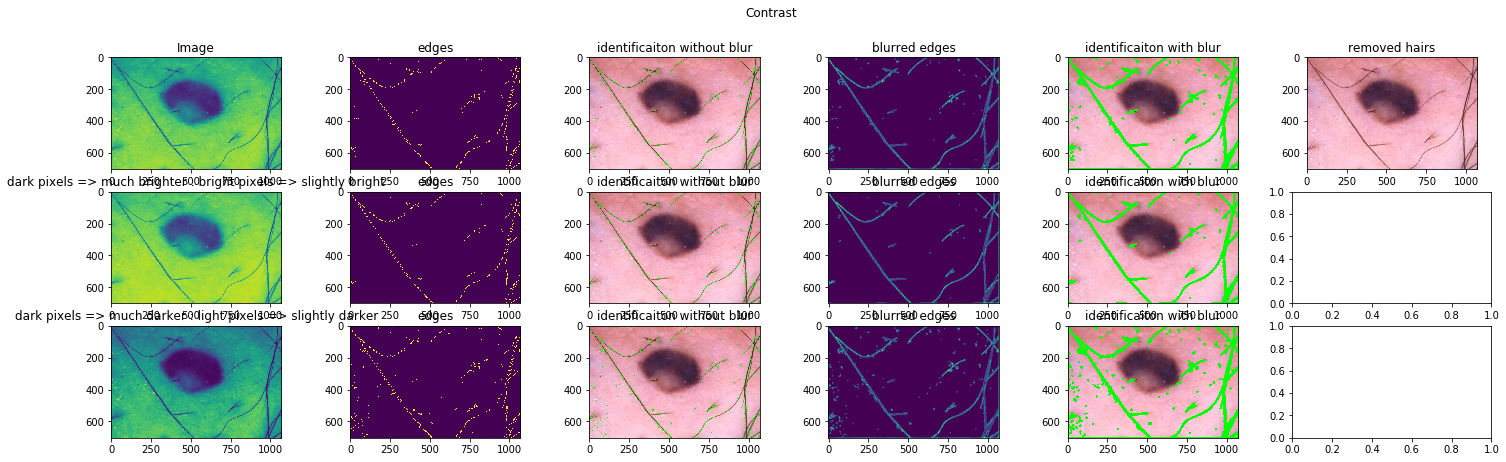

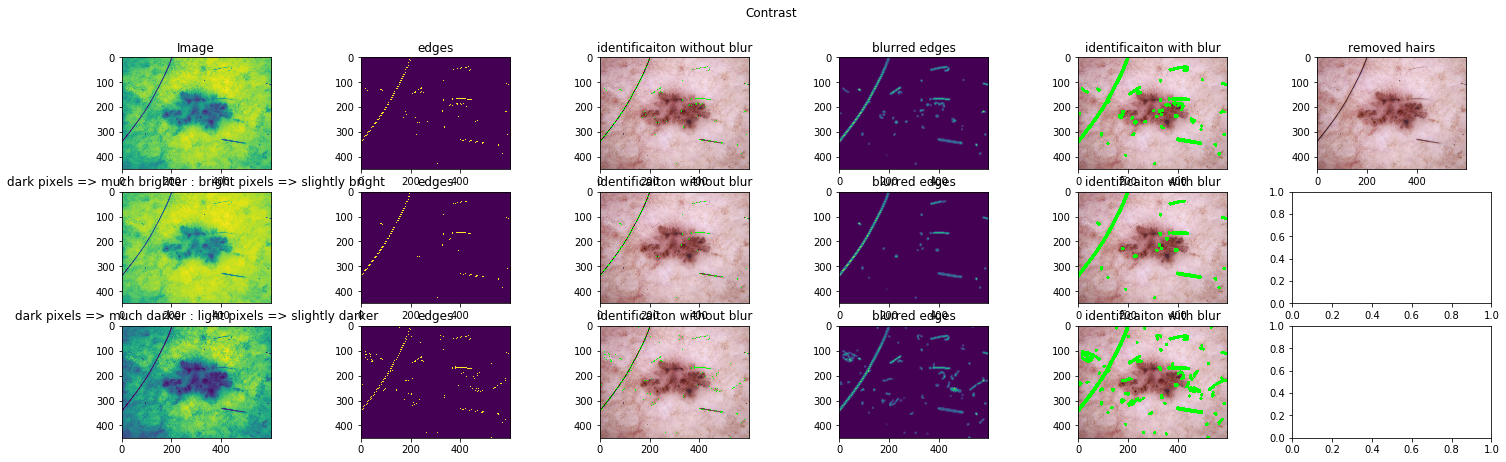

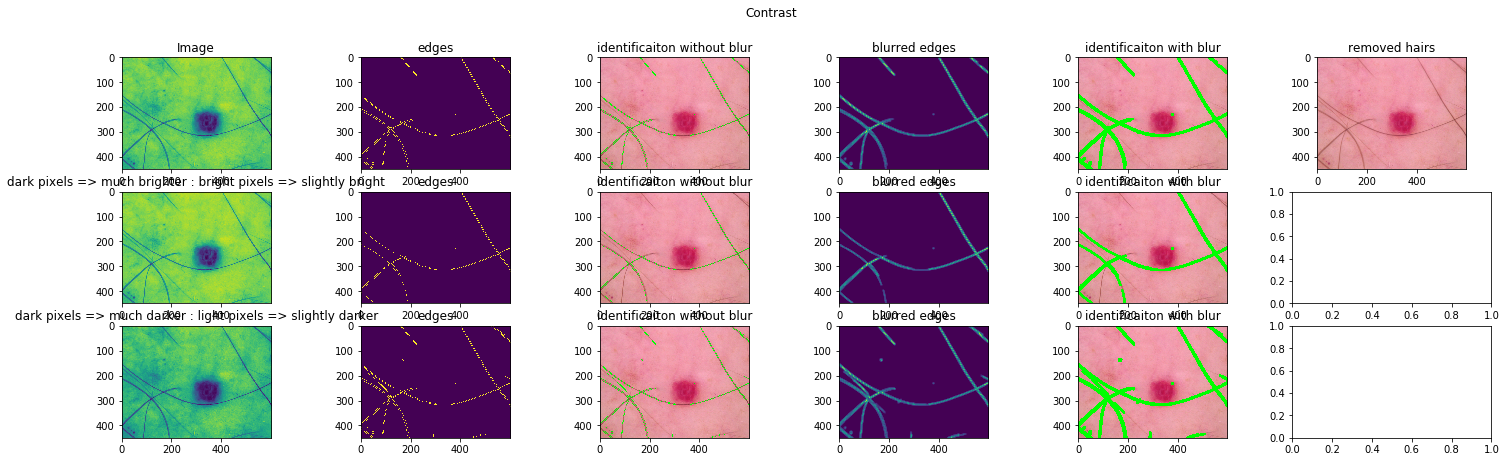

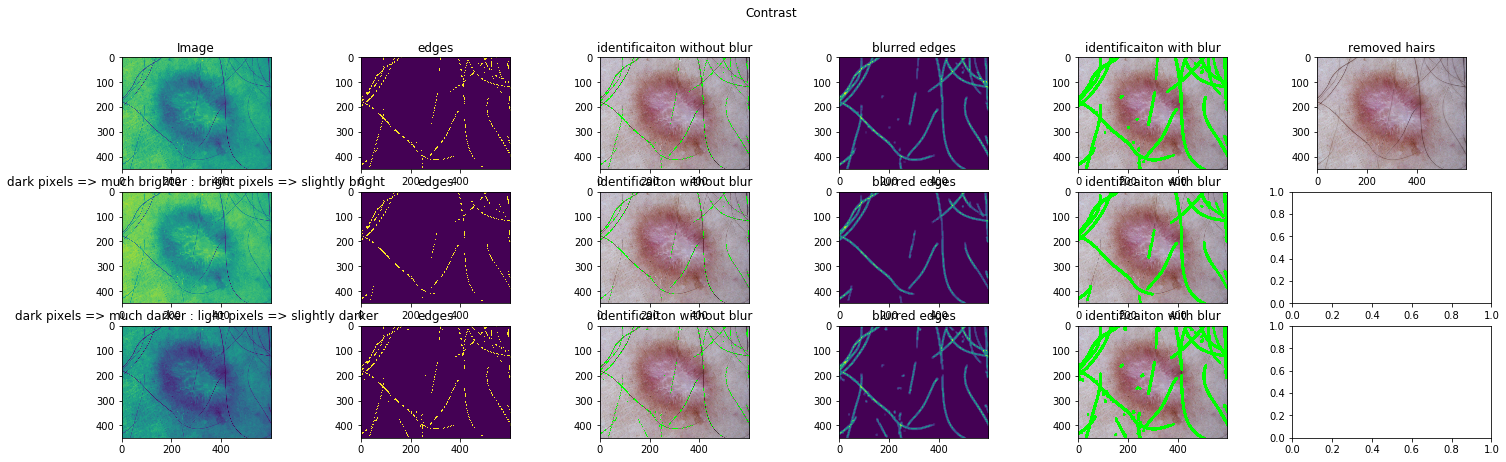

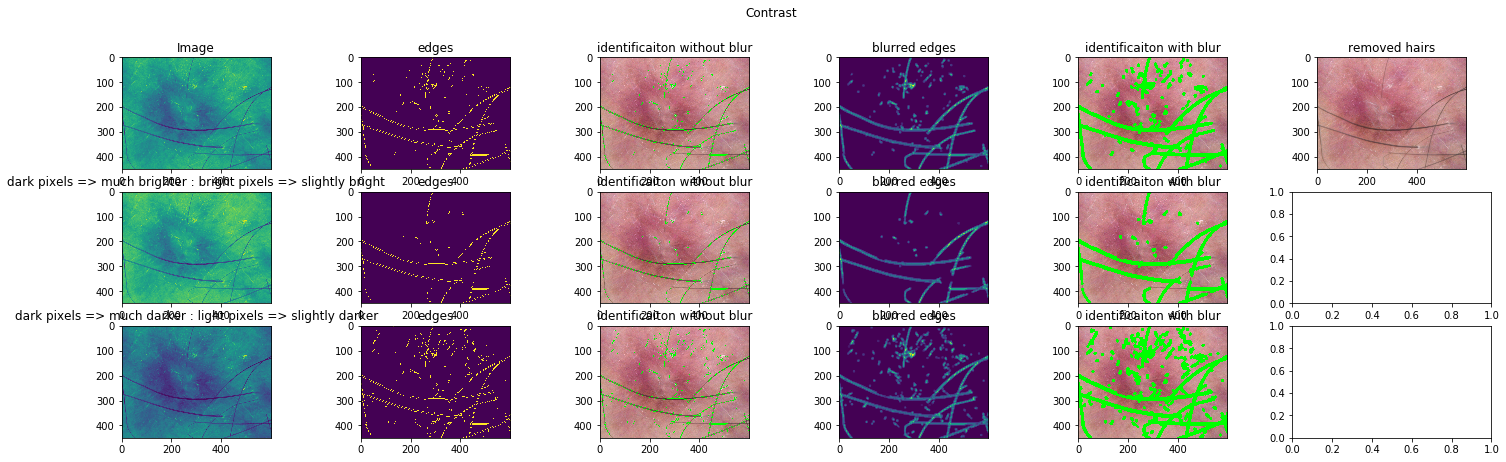

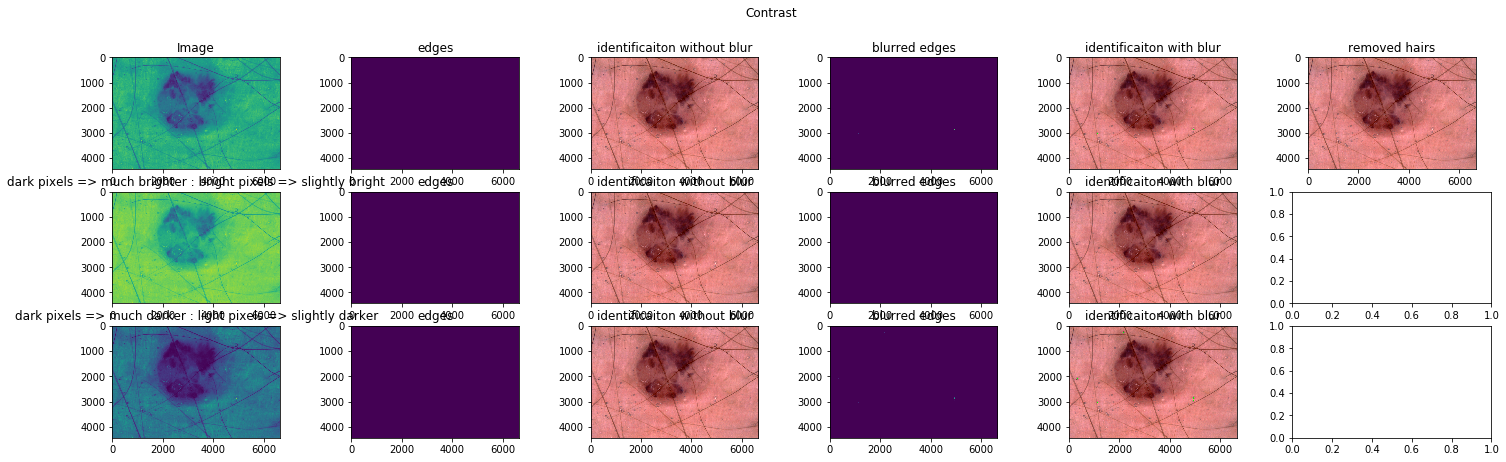

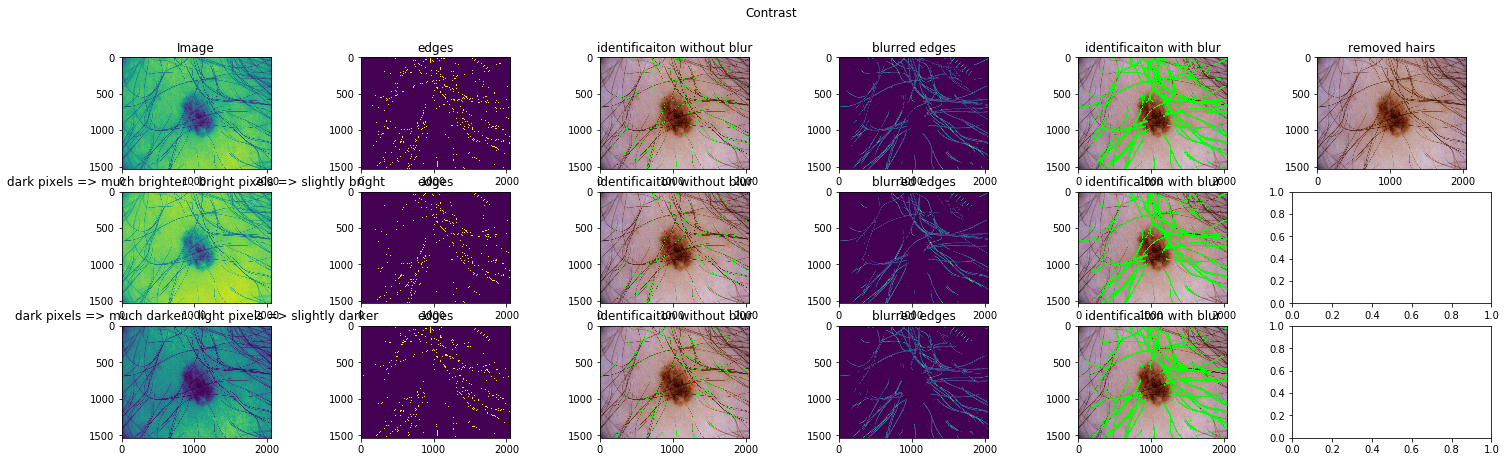

In [120]:
for i in range(7):
    showContrastWithBluredEdgeDetection(i)

## Attempt 2

In [3]:
def greenHighlights2(imageIndex, edges):
    indices = np.where(edges != [0])
    coordinates = zip(indices[0], indices[1])
    
    img2 =  readAndConvert(imageNames[imageIndex])

    for c in coordinates:
        img2[c[0], c[1]] = (0,0,0)
    
    return img2


In [10]:
def getCoordinates(index, radius):
#     startingCorner = [index[0] - radius, index[1] - radius]
    result = []
    for i in range(index[0] - radius, index[0] + radius + 1):
        for j in range(index[1] - radius, index[1] + radius + 1):
            if i >= 0 and j >= 0:
                result.append([i, j])
            
#     print(result)
    return result

In [37]:
from statistics import mean 

def blurHairs2(imageIndex, edges, imageWithBlack):
    indices = np.where(edges != [0])
    coordinates = zip(indices[0], indices[1])
    
    img2 =  readAndConvert(imageNames[imageIndex])        
#     h, w, c = im.shape
#     print(h, w, c)
    for c in coordinates:
        x = c[0]
        y = c[1]
        r = 0
        g = 0
        b = 0
        count = 0
        exceptions = 0
        tempCoordinates = getCoordinates([x,y], 10)#[[x, y+1], [x, y-1], [x+1, y], [x+1, y+1], [x+1, y-1], [x-1, y], [x-1, y+1], [x-1, y-1]]
        for c2 in tempCoordinates:
            x2 = c2[0]
            y2 = c2[1]
            try:
                if imageWithBlack[x2, y2][0] != 0 and imageWithBlack[x2, y2][1] != 0 and imageWithBlack[x2, y2][2] != 0:
                    r = r + img2[x2, y2][0]
                    g = g + img2[x2, y2][1]
                    b = b + img2[x2, y2][2]
                    count = count + 1
            except:
                exceptions = exceptions + 1
#             print(count)
            if count > 0:
#                 print([r/count, g/count, b/count])
                img2[x,y] = [r/count, g/count, b/count]
#                 print(img2[x,y])
    print("points used: ", len(tempCoordinates) - exceptions, "exceptions ", exceptions)
    return img2

In [38]:
'''
Simple and fast image transforms to mimic:
 - brightness
 - contrast
 - erosion 
 - dilation
'''
def showContrastWithBluredEdgeDetection2(imageNameIndex):
    from pylab import array, plot, show, axis, arange, figure, uint8 

    row = 3
    col = 6

    fig2, axs = plt.subplots(row,col,  figsize=(25,7))
    fig2.suptitle('Contrast')


    # Image data
    image = cv2.imread(imageNames[imageNameIndex],0) # load as 1-channel 8bit grayscale

    axs[0, 0].set_title('Image')
    axs[0, 0].imshow(image)
    maxIntensity = 255.0 # depends on dtype of image data
    x = arange(maxIntensity) 
    edges = cv2.Canny(image,100,200)
    axs[0, 1].set_title('edges')
    axs[0, 1].imshow(edges)
    
    axs[0, 2].set_title('identificaiton without blur')
    axs[0, 2].imshow(greenHighlights2(imageNameIndex, edges))
    
    edges2 =cv2.bilateralFilter(edges,10,350,9)
    axs[0, 3].set_title('blurred edges')
    axs[0, 3].imshow(edges2)
    
    axs[0, 4].set_title('identificaiton with blur')
    blackHighlights = greenHighlights2(imageNameIndex, edges2)
    axs[0, 4].imshow(blackHighlights)
    
    axs[0, 5].set_title('removed hairs')
    axs[0, 5].imshow(blurHairs2(imageNameIndex, edges2, blackHighlights))
    
    

    # Parameters for manipulating image data
    phi = 1
    theta = 1

    # Increase intensity such that
    # dark pixels become much brighter, 
    # bright pixels become slightly bright
    newImage0 = (maxIntensity/phi)*(image/(maxIntensity/theta))**0.5
    newImage0 = array(newImage0,dtype=uint8)

    axs[1, 0].set_title('dark pixels => much brighter : bright pixels => slightly bright')
    axs[1, 0].imshow(newImage0)
    edges = cv2.Canny(newImage0,100,200)
    axs[1, 1].set_title('edges')
    axs[1, 1].imshow(edges)
    
    axs[1, 2].set_title('identificaiton without blur')
    axs[1, 2].imshow(greenHighlights2(imageNameIndex, edges))
    
    edges2 =cv2.bilateralFilter(edges,10,350,9)
    axs[1, 3].set_title('blurred edges')
    axs[1, 3].imshow(edges2)
    
    axs[1, 4].set_title('identificaiton with blur')
    blackHighlights = greenHighlights2(imageNameIndex, edges2)
    axs[1, 4].imshow(blackHighlights)
    
    axs[1, 5].set_title('removed hairs')
    axs[1, 5].imshow(blurHairs2(imageNameIndex, edges2, blackHighlights))

    y = (maxIntensity/phi)*(x/(maxIntensity/theta))**0.5

    # Decrease intensity such that
    # dark pixels become much darker, 
    # bright pixels become slightly dark 
    newImage1 = (maxIntensity/phi)*(image/(maxIntensity/theta))**2
    newImage1 = array(newImage1,dtype=uint8)


    axs[2, 0].set_title('dark pixels => much darker : light pixels => slightly darker')
    axs[2, 0].imshow(newImage1)
    edges = cv2.Canny(newImage1,100,200)
    axs[2, 1].set_title('edges')
    axs[2, 1].imshow(edges)
    
    axs[2, 2].set_title('identificaiton without blur')
    axs[2, 2].imshow(greenHighlights2(imageNameIndex, edges))
    
    edges2 =cv2.bilateralFilter(edges,10,350,9)
    axs[2, 3].set_title('blurred edges')
    axs[2, 3].imshow(edges2)
    
    axs[2, 4].set_title('identificaiton with blur')
    blackHighlights = greenHighlights2(imageNameIndex, edges2)
    axs[2, 4].imshow(blackHighlights)
    
    axs[2, 5].set_title('removed hairs')
    axs[2, 5].imshow(blurHairs2(imageNameIndex, edges2, blackHighlights))

    z = (maxIntensity/phi)*(x/(maxIntensity/theta))**2

    # # Plot the figures
    # figure()
    # plot(x,y,'r-') # Increased brightness
    # plot(x,x,'k:') # Original image
    # plot(x,z, 'b-') # Decreased brightness
    # #axis('off')
    # axis('tight')
    # show()

    # # Close figure window and click on other window 
    # # Then press any keyboard key to close all windows
    # closeWindow = -1
    # while closeWindow<0:
    #     closeWindow = cv2.waitKey(1) 
    # cv2.destroyAllWindows()

points used:  121 exceptions  320
points used:  121 exceptions  320
points used:  121 exceptions  320


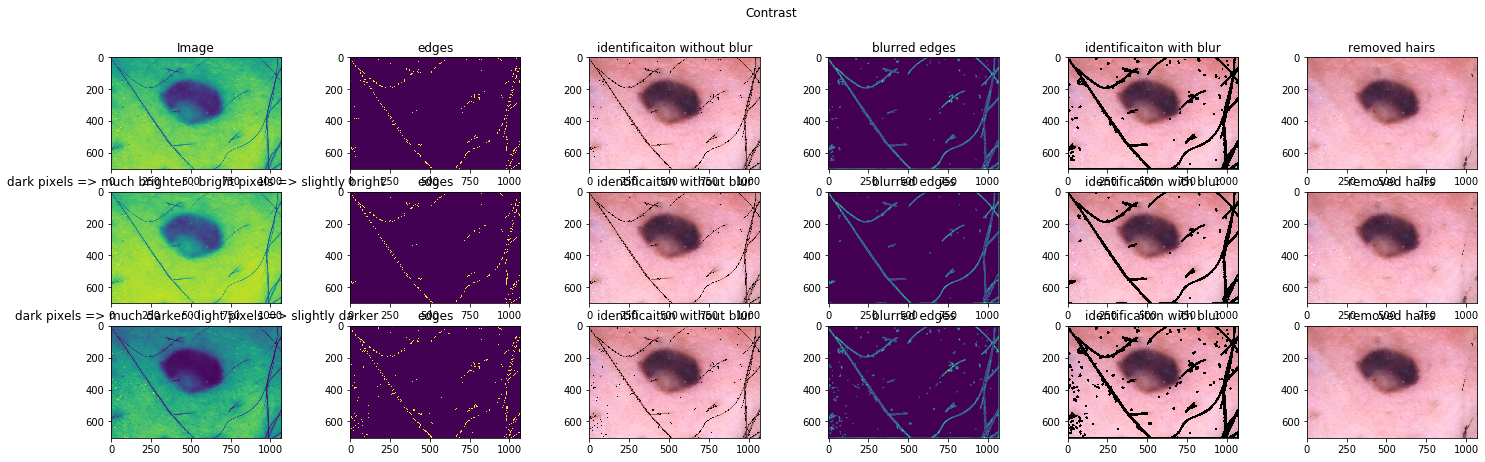

In [39]:
# for i in range(7):
showContrastWithBluredEdgeDetection2(0)

## Attempt 3